# Taller 2 de Métodos Computacionales - Capítulo 3 #

# Derivación

In [ ]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
import pandas as pd
import warnings

Es posible construir una aproximación de orden $O(h^2)$ para la derivada progresiva. Para tal propósito, se escribe el polinomio de interpolación de grado 2 para el conjunto soporte.

a) Calcular analíticamente el polinomio que interpola el conjunto soporte (PDF y código).

b) Derivar el polinomio interpolador para encontrar la derivada en el punto x (PDF y código).

In [ ]:
x = sym.Symbol('x')

x0,x1,x2,x3,x4,x5 = sym.symbols("x0,x1,x2,x3,x4,x5")
fx0,fx1,fx2,fx3,fx4,fx5 = sym.symbols("f(x0),f(x1),f(x2),f(x3),f(x4),f(x5)")

h = sym.Symbol("h")
X = [x0,x1,x2]
Y = [fx0,fx1,fx2]

def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod


def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

polynomial = Interpolate(x, X, Y)
polynomial

1.0*f(x0)*(x - x1)*(x - x2)/((x0 - x1)*(x0 - x2)) + 1.0*f(x1)*(x - x0)*(x - x2)/((-x0 + x1)*(x1 - x2)) + 1.0*f(x2)*(x - x0)*(x - x1)/((-x0 + x2)*(-x1 + x2))

In [ ]:
Derivative = sym.diff(polynomial,x)
#x0 = x, x1 = x+h , x2 = x+2h
Derivative = Derivative.subs([(x0,x),(x1,x+h),(x2,x+2*h)])
Derivative = sym.simplify(Derivative)
Derivative

(-1.5*f(x0) + 2.0*f(x1) - 0.5*f(x2))/h

c)  Para f(x) = $\sqrt{tan(x)}$ estimar la derivada progresiva de orden $O(h^2)$ en el intervalo $[0.1, 1.1]$ con $h = 0.01$.

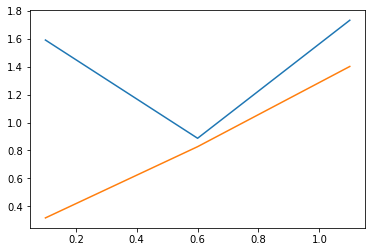

In [ ]:
def Function(x):
  return np.sqrt(np.tan(x))

X = np.linspace(0.1,1.1,3)
Y = Function(X)

def ProgressiveDerivative(f,x,h=0.01):
  derivative = (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)
  return derivative

dy = ProgressiveDerivative(Function,X)
plt.plot(X, dy)
plt.plot(X,Y)

d)  Para $f(x)=\sqrt{tan(x)}$ estimar la derivada central de orden $O(h^2)$ en el intervalo $[0.1, 1.1]$ con $h=0.01$.

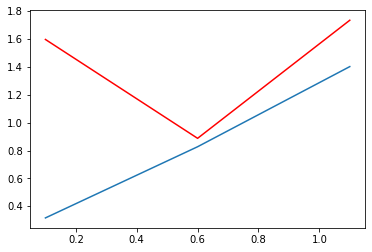

In [ ]:
def CentralDerivative(f,x,h=0.01):
  return (f(x+h)-f(x-h))/(2*h)

dy1 = CentralDerivative(Function,X)
plt.plot(X, dy1,color="r")
plt.plot(X,Y)

e) Calcule analíticamente la derivada de la función f(x), y grafique con la estimación central y progresiva de orden $O(h^2)$.

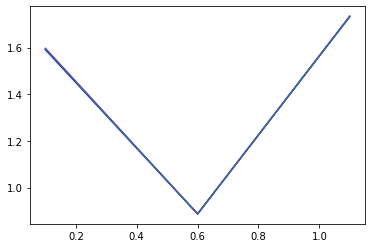

In [ ]:
def Derivative(x):
  return 0.5/(np.cos(x)**2*np.sqrt(np.tan(x)))

dy2 = Derivative(X)
plt.plot(X, dy,color="b")
plt.plot(X, dy1,color="r")
plt.plot(X,dy2)

f) Grafique el error nodal para ambas aproximaciones. ¿Tienen efectivamente el mismo orden de precisión ambos resultados?

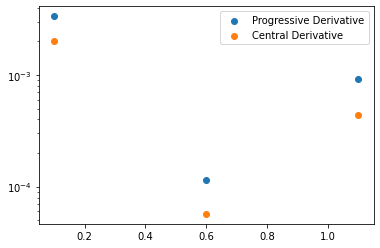

In [ ]:
error1 = np.abs((dy2 - dy))
error2 = np.abs((dy2 - dy1))

plt.scatter(X, error1, label='Progressive Derivative')
plt.scatter(X, error2, label='Central Derivative')
plt.yscale('log')
plt.legend()

In [ ]:
np.set_printoptions(suppress=True)
for i in range(len(error1)):
  print("Error1: {0}, Error2: {1}".format(np.format_float_scientific(error1[i]), 
                                          np.format_float_scientific(error2[i])))

Error1: 3.35026877390332e-03, Error2: 2.002709390768187e-03
Error1: 1.1458921657858667e-04, Error2: 5.706160213025946e-05
Error1: 9.272932323096672e-04, Error2: 4.3850465088079993e-04


Por lo tanto, contestando a la pregunta y analizando los datos:

* El orden de precisión para el primer y tercer valor de error son iguales. Sin embargo, en el segundo dato, la derivada central tiene un orden de precisión mayor.

* Parece ser que la derivada central tiene una mejor precisión.

# Raíces de polinomios

Calcular todas las raíces reales de los primeros 20 polinomios de Laguerre con la fórmula de Rodrigues.

In [ ]:
def LaguerrePolynomials(x,n):

    function = sym.exp(-x)*x**n
    derivative = sym.diff(function,x,n)

    poly = (sym.exp(x)/sym.factorial(n))
    polynomial = poly*derivative

    return polynomial

x = sym.Symbol('x')
y = np.array([])

n= 20

for i in range(1,n+1): #Se omite el primer polinomio porque es 1

    f = sym.simplify(LaguerrePolynomials(x,i))
    y = np.append(y,f)

In [ ]:
def GetNewtonRaphson(f,df,xn,itmax = 1000, precision=1e-7): 
    error = 1
    it = 0
    while error > precision and it <= itmax:
        try:    
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn))  
        except ZeroDivisionError:   
            print('Division por cero')    
        it += 1
        xn = xn1
    return xn
    
def GetAllRoots(x_,func,tolerancia=5):

    function = sym.lambdify([x],func)
    dfunc = sym.diff(func,x,1)
    derivative = sym.lambdify([x],dfunc)

    Roots = np.array([])
    for i in x_:
      root = GetNewtonRaphson(function,derivative,i)
      if root != False and np.isfinite(root) == True:
          croot = np.round(root, tolerancia)
          if croot not in Roots:
              Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots

x_ = np.linspace(0,100,2000)


for i in range(len(y)):
  Roots = GetAllRoots(x_, y[i])
  print("Polynomial {0}: {1}, #Roots: {2}".format(i+1, Roots, len(Roots)))


warnings.filterwarnings("ignore")

#El numero de raices de un polinomio de laguerre es igual a su grado polinomial 

Polynomial 1: [1.], #Roots: 1
Polynomial 2: [0.58579 3.41421], #Roots: 2
Polynomial 3: [0.41577 2.29428 6.28995], #Roots: 3
Polynomial 4: [0.32255 1.74576 4.53662 9.39507], #Roots: 4
Polynomial 5: [ 0.26356  1.4134   3.59643  7.08581 12.6408 ], #Roots: 5
Polynomial 6: [ 0.22285  1.18893  2.99274  5.77514  9.83747 15.98287], #Roots: 6
Polynomial 7: [ 0.19304  1.02666  2.56788  4.90035  8.18215 12.73418 19.39573], #Roots: 7
Polynomial 8: [ 0.17028  0.9037   2.25109  4.2667   7.04591 10.75852 15.74068 22.86313], #Roots: 8
Polynomial 9: [ 0.15232  0.80722  2.00514  3.78347  6.20496  9.37299 13.46624 18.8336
 26.37407], #Roots: 9
Polynomial 10: [ 0.13779  0.72945  1.80834  3.40143  5.5525   8.33015 11.84379 16.27926
 21.99659 29.9207 ], #Roots: 10
Polynomial 11: [ 0.1258   0.66542  1.64715  3.09114  5.02928  7.50989 10.60595 14.43161
 19.17886 25.21771 33.49719], #Roots: 11
Polynomial 12: [ 0.11572  0.61176  1.51261  2.83375  4.59923  6.84453  9.62132 13.00605
 17.11686 22.15109 28.48797 37

In [ ]:
for i in range(len(y)):
  roots =sym.nroots(y[i])
  print("Polynomial {0} Roots: {1}, #Roots: {2} \n".format(i+1 ,roots,len(roots)))

Polynomial 1 Roots: [1.00000000000000], #Roots: 1 

Polynomial 2 Roots: [0.585786437626905, 3.41421356237309], #Roots: 2 

Polynomial 3 Roots: [0.415774556783479, 2.29428036027904, 6.28994508293748], #Roots: 3 

Polynomial 4 Roots: [0.322547689619392, 1.74576110115835, 4.53662029692113, 9.39507091230113], #Roots: 4 

Polynomial 5 Roots: [0.263560319718141, 1.41340305910652, 3.59642577104072, 7.08581000585884, 12.6408008442758], #Roots: 5 

Polynomial 6 Roots: [0.222846604179261, 1.18893210167262, 2.99273632605931, 5.77514356910451, 9.83746741838259, 15.9828739806017], #Roots: 6 

Polynomial 7 Roots: [0.193043676560362, 1.02666489533919, 2.56787674495075, 4.90035308452648, 8.18215344456286, 12.7341802917978, 19.3957278622625], #Roots: 7 

Polynomial 8 Roots: [0.170279632305101, 0.903701776799380, 2.25108662986613, 4.26670017028766, 7.04590540239347, 10.7585160101810, 15.7406786412780, 22.8631317368893], #Roots: 8 

Polynomial 9 Roots: [0.152322227731808, 0.807220022742256, 2.00513515561

# Interpolación de Lagrange

En el lanzamiento de una bala, una cámara fotográfica registra las siguientes posiciones en metros respecto al arma homicida: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv

Estime el vector velocidad inicial, que estaría definido por la magnitud y dirección. Rpta: $V_0 = 10 m/s$ y $θ = 20◦$.

Hint: Encuentre el termino lineal y cuadrático de la interpolación y compare con la ecuación de trayectoria de la bala

(Tome $g = −9.8 m/s^2 j$):

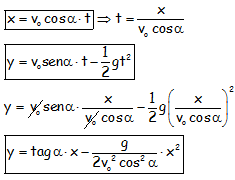

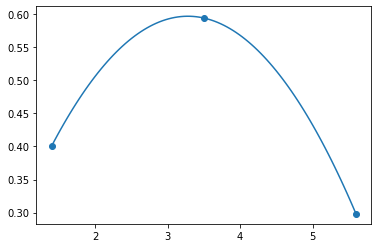

In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Parabolico.csv"
DataFrame = pd.read_csv(url,engine='python')
X = np.array(DataFrame["X"])
Y = np.array(DataFrame["Y"])

def Lagrange(x,xi,j):
    
    prod = 1.0
    n = len(xi)
    
    for i in range(n):
        if i != j:
            prod *= (x - xi[i])/(xi[j]-xi[i])
            
    return prod
def Interpolate(x,xi,yi):
    
    Sum = 0.
    n = len(xi)
    
    for j in range(n):
        Sum += yi[j]*Lagrange(x,xi,j)
        
    return Sum

x_ = np.linspace(X[0],X[-1],100)
plt.plot(x_,Interpolate(x_,X,Y))
plt.scatter(X,Y)

In [ ]:
function = Interpolate(x,X,Y)
function = sym.simplify(function)
function

x*(0.363970234266202 - 0.0554912422401579*x)

In [ ]:
# Comparando con la fórmula y la interpolación, sería:
# 0.363970234266202 = tan(alpha)

alpha = np.arctan(0.363970234266202)
grades_alpha = alpha*(180/np.pi)
grades_alpha

19.999999999999982

In [ ]:
# Comparando con la fórmula y la interpolación, sería:
# 0.0554912422401579 = (9.8)/(2*v0^2*cos(alpha)^2)
# (2*v0^2*cos(alpha)^2)  = 9.8/0.0554912422401579
# v0^2 = 9.8/(2*0.0554912422401579*cos(alpha)^2)

v0_cuadrado = 9.8/(2*0.0554912422401579*np.cos(alpha)**2)
v0 = np.sqrt(v0_cuadrado)
v0

10.0

Interpolación Newton-Gregory: Para el siguiente conjunto de puntos:
https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv
Encuentre el polinomio interpolante de menor grado usando el método Newton-Gregory.

In [ ]:
url = "https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/InterpolacionNewtonNoequi.csv"
DataFrame = pd.read_csv(url,engine='python')
X = np.array(DataFrame["X"])
Y = np.array(DataFrame["Y"])

-0.00219478737997257*x**5 + 0.165157750342936*x**4 - 1.91458984910837*x**3 + 6.99914403292181*x**2 - 3.40385185185185*x - 18.0

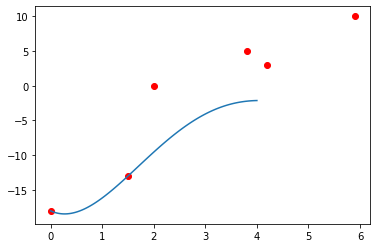

In [ ]:
def NewtonInterpolation(X,Y,x):
    
    sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(X)))
    h = X[1] - X[0]
    
    Diff[:,0] = Y
    
    poly = 1.0
    
    for i in range(1,len(X)):
        
        poly *= (x - X[i-1])
        
        for j in range(i,len(X)): 
            
            Diff[j,i] = (Diff[j,i-1] - Diff[j-1,i-1])
    
        sum_ += poly*Diff[i,i]/(np.math.factorial(i)*h**(i))

    return sum_

xt = np.linspace(X[0],4,100)

yt = []

for i in range(len(xt)):
    yt.append(NewtonInterpolation(X,Y,xt[i]))
plt.scatter(X,Y,color='r',marker='o')
plt.plot(xt,yt)

# Al utilizar esa formula de diferencias divididas con el factorial y h,
# el polinomio no interpola correctamente. Esto pasa porque no tenemos 
# una discretización equisdistante en las coordendas x.

poly = NewtonInterpolation(X, Y, x)
sym.simplify(poly)

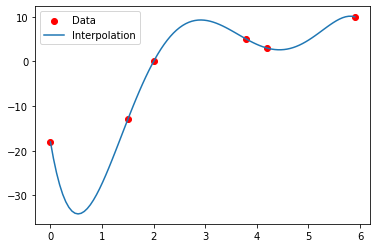

-0.34145435774264*x**5 + 5.84804869821673*x**4 - 35.6998197753506*x**3 + 89.657566164176*x**2 - 68.8369730888011*x - 18.0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonInterpolation(X, Y, x):
    
    sum_ = Y[0]
    
    Diff = np.zeros((len(X),len(X)))
    
    Diff[:,0] = Y
    
    poly = 1.0
    
    for i in range(1, len(X)):
        
        poly *= (x - X[i-1])
        
        for j in range(i, len(X)):
            
            Diff[j,i] = (Diff[j,i-1] - Diff[j-1,i-1]) / (X[j]-X[j-i])

        sum_ += poly * Diff[i,i]
    
    return sum_


xt = np.linspace(X[0], X[-1], 100)

yt = NewtonInterpolation(X, Y, xt)
plt.scatter(X, Y, color = "red",label='Data')
plt.plot(xt, yt, label='Interpolation')
plt.legend()

plt.show()

# En este caso, usamos otra formula para la interpolación de Newton.
# En vez de usar h y el factorial, se usa la diferencia de coordenadas
# en el eje x para distintas posiciones en la discretización al no ser
# equisdistante.

poly = NewtonInterpolation(X, Y, x)
sym.simplify(poly)

# Integración

7. Una forma de generalizar el método de integración del trapecio para una integral doble de una función f(x, y) consiste en dividir el plano xy en un grilla de cuadrados iguales y calcular el promedio del valor de la función de cada uno de los 4 vértices de cada cuadrado
pequeño de la grilla. Calcule numéricamente el volumen de una semiesfera de radio R = 1.

In [ ]:
R = 1
n = 1000
x = np.linspace(-R,R,n+1)
y = np.linspace(-R,R,n+1)
A = (x[1]-x[0])**2 

X, Y = np.meshgrid(x,y)


def f(x,y):
    z = -x**2 - y**2 + R**2
    if z <= 0:
        return 0
    else:
        return np.sqrt(z)

volumen = 0

for i in range(len(x)):
    for j in range(len(y)):
        volumen += A*f(X[i,j],Y[i,j])

volumen

2.0943883788632442

14. Escribir el polinomio $p(x) = 3 + 5x + x^2$ en la base de Legendre.

In [ ]:
from sympy.solvers import solve

x = sym.Symbol('x')
   
p0 = 1
p1 = x
p2 = 0.5*((3*x**2)-1)    

a,b,c = sym.symbols("a,b,c")


r = solve(a*p0 + b*p1 + c*p2 - x**2-5*x-3 , (a,b,c))

p0,p1,p2 = sym.symbols("p0,p1,p2")

r = p0*r[a]+p1*r[b]+p2*r[c]

r

3.33333333333333*p0 + 5.0*p1 + 0.666666666666667*p2

17. En el problema de la radiación del cuerpo negro aparece cierta integral mostrada en las notas de la clase.

a) Calcular numéricamente esta integral usando la cuadratura de Gauss-Laguerre para n = 3 puntos de evaluación.

In [ ]:
def Function(x):
  return x**3 / (np.exp(x)-1)

def GaussLaguerre(n):
  Laguerre = LaguerrePolynomials(x,n)
  Laguerre1 = LaguerrePolynomials(x,n+1)

  X = GetAllRoots(x_, Laguerre)

  W = np.array([])

  for i in X:
    wk = i/(n+1)**2
    wk /= Laguerre1.subs(x,i)**2
    W = np.append(W,wk)

  integral = 0
  for j in range(n):
      integral += W[j] * Function(X[j]) * np.exp(X[j])

  return integral

Integrate = GaussLaguerre(3)
Integrate

6.48113246452255

b) Para esta estimación, grafique el error relativo como función de los puntos de evaluación, con n = [2, 3, ..., 10].

In [ ]:
N = np.arange(2,11,1)

E = np.array([])
for j in N:
  E = np.append(E,GaussLaguerre(j))

I = np.pi**4/15

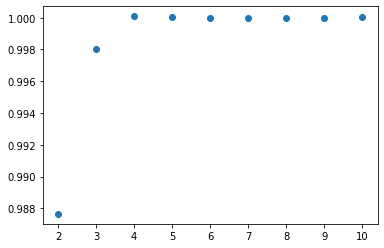

In [ ]:
plt.scatter(N, E/I)

18. La cuadratura de Gaus-Hermite está definida para integrales de la forma mostrada en las notas de clase con el intervalo de -infinito a infinito.

a) Encontrar los primeros 20 ceros de los polinomios y los correspondientes pesos de la
cuadratura.

In [ ]:
def HermitePolynomials(x,n):

    function = sym.exp(-x**2)
    derivative = sym.diff(function,x,n)

    poly = (-1)**n*sym.exp(x**2)
    polynomial = poly*derivative

    return polynomial

x = sym.Symbol('x')

In [ ]:
def GetNewtonRaphson(f,df,xn,itmax = 100, precision=1e-5): 
    error = 1
    it = 0
    while error > precision and it <= itmax:
        try:    
            xn1 = xn - f(xn)/df(xn)
            error = np.abs(f(xn)/df(xn)) 
        except ZeroDivisionError:   
            print('Division por cero')    
        it += 1
        xn = xn1
    return xn
    
def GetAllRoots(x_,func,tolerancia=5):

    function = sym.lambdify([x],func)
    dfunc = sym.diff(func,x,1)
    derivative = sym.lambdify([x],dfunc)

    Roots = np.array([])
    for i in x_:
      root = GetNewtonRaphson(function,derivative,i)

      if np.isfinite(root) == True:
        croot = np.round(root, tolerancia)
        if croot not in Roots:
            Roots = np.append(Roots,croot)
                
    Roots.sort()
        
    return Roots

x_ = np.linspace(-10,10,1000)

In [ ]:

TotalRoots = 0
TotalWeights = 0

for n in range(1,7):

  Weights = np.array([])

  X = GetAllRoots(x_,HermitePolynomials(x,n))
  TotalRoots += len(X)

  W = 2**(n-1) * np.math.factorial(n) * np.sqrt(np.pi)
  W /= n**2
  H = sym.lambdify([x],HermitePolynomials(x,n-1))
  W /= H(X)**2

  print("Polynomial {0} Roots and Weights: {1}, {2}".format(n,X,W))

print("\n First {0} Roots".format(TotalRoots))

  

Polynomial 1 Roots and Weights: [0.], 1.7724538509055159
Polynomial 2 Roots and Weights: [-0.70711  0.70711], [0.88621886 0.88621886]
Polynomial 3 Roots and Weights: [-1.22474  0.       1.22474], [0.29541603 1.1816359  0.29541603]
Polynomial 4 Roots and Weights: [-1.65068 -0.52465  0.52465  1.65068], [0.0813129  0.80491008 0.80491008 0.0813129 ]
Polynomial 5 Roots and Weights: [-2.02018 -0.95857  0.       0.95857  2.02018], [0.0199537  0.39362304 0.94530872 0.39362304 0.0199537 ]
Polynomial 6 Roots and Weights: [-2.3506  -1.33585 -0.43608  0.43608  1.33585  2.3506 ], [0.00453022 0.15706654 0.72462632 0.72462632 0.15706654 0.00453022]

 First 21 Roots


b) Estime numéricamente el valor cuadrático medio de la posición de la partícula en el primer estado exitado (n = 1).

In [ ]:
def Oscillator(x):
  return (1/np.sqrt(2))*(1/np.pi)**(1/4)*np.exp(-x**2/2)*2*x

def Function(x):
  return Oscillator(x)**2*x**2

def GaussHermite(X,W):
  Integrate = 0
  for i in range(len(X)):
    Integrate+= W[i]*Function(X[i])*np.exp(X[i]**2)
  return Integrate
  
GaussHermite(X,W)

1.5000106359472738

19.  Existe una temperatura a la cuál la banda prohibida tiende a cero $∆(T) → 0$, dicha temperatura es la temperatura crítica Tc donde el material se convierte en superconductor. Para estimar Tc de este
material les propongo la siguiente estrategia:

(a) Implemente la función a integrar en Python. Esta función debe tener la temperatura T y el tamaño de la banda prohibida $∆'(T)$ como parámetros.

(b) Cargar los puntos y los pesos de la cuadratura de Gaus-Legendre a orden n = 50.

In [ ]:
dt = sym.Symbol("dt")
t = sym.Symbol("t")
def Function(x,t,dt):
  return 0.5*(sym.tanh(sym.sqrt(x**2+dt**2)*300/(2*t)))/(sym.sqrt(x**2+dt**2))

def gauss_legendre_integrate(f):
  X, W = np.polynomial.legendre.leggauss(50)
  Sum = 0
  for i in range(len(X)):
    Sum += (W[i]*f(X[i],t,dt))
  return Sum

I = gauss_legendre_integrate(Function)

(c) Debe variar la temperatura del material entre 1 a 20 en pasos de $dT = 1 × 1/10^4$ y hacer el cálculo de la integral.

(d) En ese sentido deberá usar algún criterio de parada del algoritmo.

In [ ]:
st = 0.0001
T = np.arange(1,20,st)
Ic = sym.lambdify([t],I.subs(dt,0),"numpy")

def CriticalTemp(T):
  for i in T:
    Integral = Ic(i)
    c = (1/0.3)
    if abs(Integral-c) < st:
      return i

Tc = round(CriticalTemp(T),4)

print("La temperatura crítica es aproximadamente: Tc = {0}".format(Tc))

La temperatura crítica es aproximadamente: Tc = 12.1336
